
## Objective : 

* To identify the different factors that impact the failure to achieve the outcome
* To make a model to predict if your client will acheive the outcome or not


## Dataset :

The dataset has the following variables:

- Age - age of client
- Income - annual income of client
- Houshold size - number of people living in the household
- Number of services - total number of services of client per program year
- Duration - number of days(calculated the date when the case was opened and the day when outcome was achieved)
- Goals - number of goals set to acheive
- Failed - Yes/No (1;0) if client failed to acheive any outcomes.


### Import the necessary libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression

#to build SVM model
from sklearn.svm import SVC

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

#to build tree based models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [139]:
#reading the dataset
df = pd.read_csv("C:/Users/aleks/OneDrive/Desktop/Great/LogitProgram.csv")

In [140]:
df.head(5)

,Failed,Age,Household,Cases,Income,Service,Duration,Outcome
0,No,41,4,1,21580,4,64,net worth
1,Yes,52,1,2,4009,11,238,avoided eviction
2,No,34,1,2,22454,1,24,affordable housing
3,No,34,1,2,22454,7,8,affordable housing
4,No,34,1,2,32552,27,131,affordable housing


### Printing the information

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Failed     603 non-null    object
 1   Age        603 non-null    int64 
 2   Household  603 non-null    int64 
 3   Cases      603 non-null    int64 
 4   Income     603 non-null    int64 
 5   Service    603 non-null    int64 
 6   Duration   603 non-null    int64 
 7   Outcome    603 non-null    object
dtypes: int64(6), object(2)
memory usage: 33.0+ KB


**Observations:**
- There are 603 observations and 8 columns.
- There are no missing values in the data.

**Let's check the unique values in each column** 

In [142]:
#checking unique values in each column
df.nunique()

Failed         2
Age           59
Household      7
Cases          5
Income       289
Service       35
Duration     217
Outcome        5
dtype: int64

In [143]:
#Creating numerical columns
num_cols=['Age','Household','Cases','Income','Service','Duration']

#Creating categorical variables 
cat_cols= ['Failed','Outcome']

### Analysis of numerical columns

In [144]:
#summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,603.0,42.825871,12.571438,19.0,33.5,40.0,51.0,86.0
Household,603.0,1.827529,1.348103,1.0,1.0,1.0,2.0,7.0
Cases,603.0,1.499171,0.841954,1.0,1.0,1.0,2.0,6.0
Income,603.0,18120.140962,14748.433955,0.0,7482.0,15600.0,26663.0,68850.0
Service,603.0,5.369818,7.129851,1.0,1.0,3.0,6.0,56.0
Duration,603.0,85.497512,90.648813,1.0,16.0,51.0,134.0,346.0


**Observations:**
- Average client age is around 42 years with SD 12.  The age range is from 18 years to 60, indicating good age diversity in the program enrollment.
- the most common size of household is two persons. The max number of people in the household is 7.
- The majority of clients work one case.
- There are clients with no income on the day of enrollment. The average income is $18120.
- The average of services received is 6. The min is 1 whereas max is 56. The 50 of clients received from 1 to 6 services.
- Number of days in program spent is 85. The SD is 90 days. The majority of clients spent from 16 to 134 days in program.


Let's explore these variables in some more depth by observing their distributions

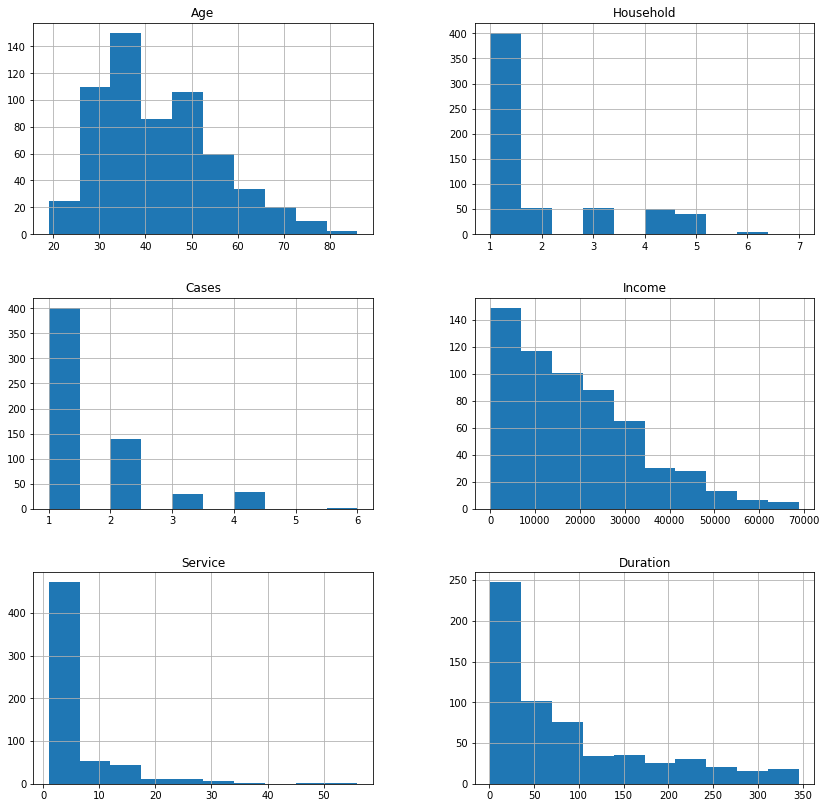

In [145]:
#creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- The age distribution is close to a normal distribution with the majority of clients between the ages of 30 and 50.

- The household size is skewed to the right. The most frequent size of household is single member.

- Number of cases skewed to the right. About 80% of clients had only one case opened, 15 % had two cases, and the rest belongs to 3 and 4 cases. 

- Income skewed to the right. The distribution shows that there are clients with no income. The majortiy of households have income below average.

- The service distribution skewed to the right. The majority of clients received fro 1 to 20 services. The data shows that there are clients that received more than 20 services.

- The duration distribution shows that majority of clients spent less then 3 months (100 days) in program. 



### Univariate analysis for categorical variables

In [146]:

for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

No     0.674959
Yes    0.325041
Name: Failed, dtype: float64
****************************************
affordable housing    0.394693
avoided eviction      0.373134
net worth             0.197347
food security         0.029851
housing vouchers      0.004975
Name: Outcome, dtype: float64
****************************************


**Observations:**

- 32% of clients did not achieve outcome; therefore, failed to complete the program successfully.
- The majority of clients requested assistance in obtaining housing - 39%, avoided eviction - 37 and net worth - 19%.

### Bivariate and Multivariate analysis

**Checking how failed rate is related with other categorical variables**

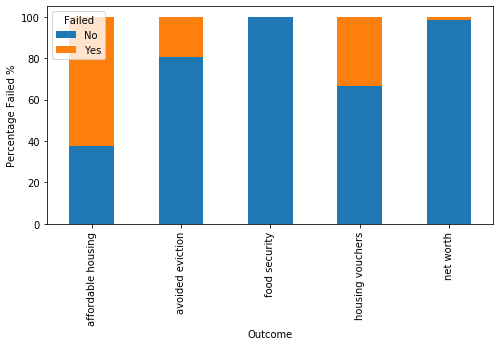

In [147]:
for i in cat_cols:
    if i!='Failed':
        (pd.crosstab(df[i],df['Failed'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Failed %')

**Observations:**
    
- 60% of clients failed to obtain affordable housing.
- 20% of clients failed to avoid eviction.
- 25% of clients failed to get housing vouchers.
- 1% of clients failed to increase net worth.

**Relationship between failed to complete the program and numerical variables**

In [148]:
#Mean of numerical variables grouped by failed
df.groupby(['Failed'])[num_cols].mean(). round(1)

,Age,Household,Cases,Income,Service,Duration
Failed,,,,,,
No,42.1,1.8,1.6,17800.3,4.7,53.2
Yes,44.2,1.8,1.2,18784.2,6.8,152.5


**Observations:**
- The clients who failed to complete the program are slightly older mean 44 vs 42, who completed the program, their income is higher 18785 US dollars vs 17800. They receive more services, and they also stay longer in program mean = 152 vs 53 days, who completed the program successfully. 

### The relationship between different numerical variables

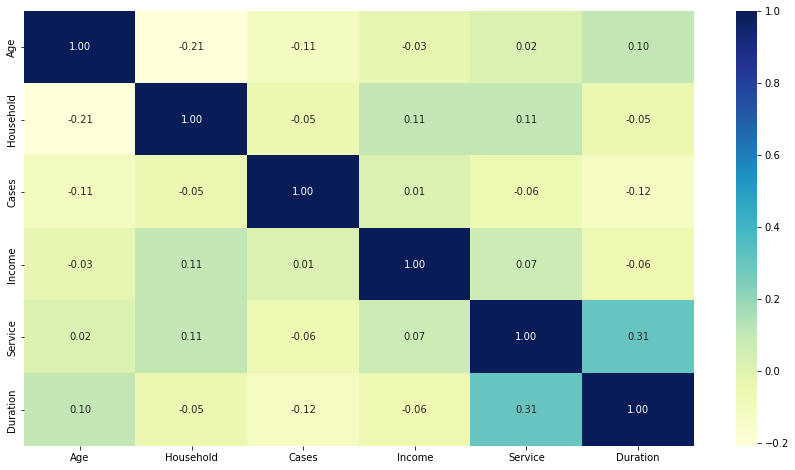

In [149]:
#plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- From the heatmap, it can be noted that there is no strong relationship between numerical variables. There is some positive relationship noticed between duration and services. This can be explained that the longer person is staying in program, s/he is likely to receive more services.

**Now we have explored our data. Let's build the model**

## Model Building - Approach
1. Prepare data for modeling
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

###  Preparing data for modeling

**Creating dummy variables for categorical Variables**

In [150]:
data=df.copy()

#creating list of dummy columns
to_get_dummies_for = ['Outcome']

#creating dummy variables
df = pd.get_dummies(data = df, columns= to_get_dummies_for)      

#mapping overtime and attrition
dict_failed = {'Yes': 1, 'No': 0}


df['Failed'] = df.Failed.map(dict_failed)


In [151]:
df.head(3)

,Failed,Age,Household,Cases,Income,Service,Duration,Outcome_affordable housing,Outcome_avoided eviction,Outcome_food security,Outcome_housing vouchers,Outcome_net worth
0,0,41,4,1,21580,4,64,0,0,0,0,1
1,1,52,1,2,4009,11,238,0,1,0,0,0
2,0,34,1,2,22454,1,24,1,0,0,0,0


**Separating the independent variables (X) and the dependent variable (Y)**

In [152]:
#Separating target variable and other variables
Y= df.Failed
X= df.drop(columns = ['Failed'])

### Scaling the data

In [153]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [154]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1,stratify=Y)

### Model evaluation criterion

#### The model can make two types of wrong predictions:
1. Predicting a client will complete the program successfully when the clients does not
2. Predicting a client will fail to complete the program and s/he actually completes the program successfully

#### Which case is more important? 
* Predicting that client will not fail but s/he fails to complete the program i.e. losing program money (money spent no result achieved) considered a major miss.

#### How to reduce this loss i.e the need to reduce False Negatives?
* Program staff want to maximize the Recall, the greater the Recall, the higher the chances of minimizing false negatives. The program staff can identify the problematic clients, and propose back up plan to assist them to complete the program. 

In [155]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Failed', 'Failed'], 
                yticklabels=['Not Failed', 'Failed'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Building the model

2 different models:
- **Logistic Regression**
- **Support Vector Machine(SVM)**

### Logistic Regression Model 

In [156]:
#fitting logistic regression model
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

**Checking model performance**

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the client to fail the program.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a client would not fail and s/he does not fail 

* False Positive (Actual=0, Predicted=1): Model predicts a client would fail but the s/he does not fail; hence completes the program successfully.

* False Negative (Actual=1, Predicted=0): Model predicts that a client would not fail but s/he failes to complete the program

* True Positive (Actual=1, Predicted=1): Model predicts that client fails and s/he failes to complete the program

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       285
           1       0.74      0.72      0.73       137

    accuracy                           0.83       422
   macro avg       0.81      0.80      0.80       422
weighted avg       0.83      0.83      0.83       422



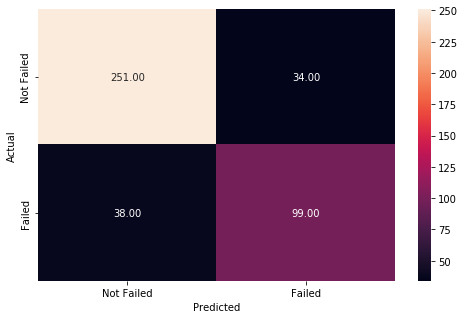

In [157]:
#checking the performance on the training data
y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       122
           1       0.72      0.71      0.72        59

    accuracy                           0.82       181
   macro avg       0.79      0.79      0.79       181
weighted avg       0.82      0.82      0.82       181



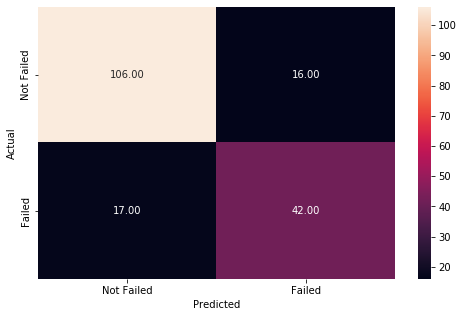

In [158]:
#checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observations:**
- The model accuracy is ~ 83% on train and test dataset.
- The recall for this model is 73% for class 1 on train and 72% on test.
- The model tells that 27% of clients, who have high chance of failure, will not be idenified. So, this will not actually solve our problem.


**Find the coefficients and variables that are leading to failure**

In [159]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
Duration,1.250512
Outcome_affordable housing,0.977742
Household,0.089169
Income,0.058019
Age,0.001497
Outcome_avoided eviction,-0.079967
Outcome_housing vouchers,-0.226492
Outcome_food security,-0.453453
Service,-0.498343
Cases,-0.818546


**Observations:**


**Features which positively affect on the program failure are:**
- Duration 	
- Outcome affordable housing	
- Household	
- Income	
- Age	

**Features which negatively affect on the program failure are:**
- Avoided eviction
- Housing vouchers
- Food security
- Service
- Cases
- Net worth


- Based on the Logistic Regression model, duration variable is important factor on successful program completition. To understand how actually it impacts the program, it is necessary to visualize it using regplot. From the below, graphs it looks like that the chance of failure increases if a client stays longer than 150 days in program.
- The second variable is obtaining housing had impact on program successful completion. From the summary statistics,  it is known that about 39% out of 603 enrolled in housing outcome. However, out of total number enrolled in housing outcome, only 40% were able to acheive the positive result. It is also likely that clients that are enrolled in housing outcome; they have to stay longer in program. This outcome requires more time and effort to complete. 
- The other variables - household, income and age have impact on program failure. 
- Other outcomes as avoided evction, housing vouchers and food security have negative coefficients because clients working on these outcomes have higher rates of success. Not so many cases of failure in these fields.


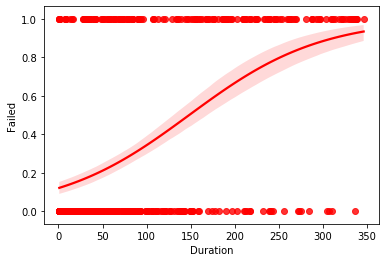

In [160]:
import seaborn as sns
sns.regplot(x='Duration', y='Failed', data=df, logistic=True, color="red")
plt.show()

Converting the log of odds into real odds by taking its exponential.

In [161]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Duration,3.492132
Outcome_affordable housing,2.658446
Household,1.093266
Income,1.059735
Age,1.001498
Outcome_avoided eviction,0.923147
Outcome_housing vouchers,0.797325
Outcome_food security,0.635430
Service,0.607537
Cases,0.441072


**Observations**
- The odds of clients being in program more than 150 days increases the failure by 3.4 times than those who don't cross that timeline.
- The odds of a client enrolled in obtaining safe housing to fail are 2.6 times higher the odd of other clients enrolled into different outcomes.
- To interpret the odds of household, income and age would not very helpful at the moment.
 

**Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

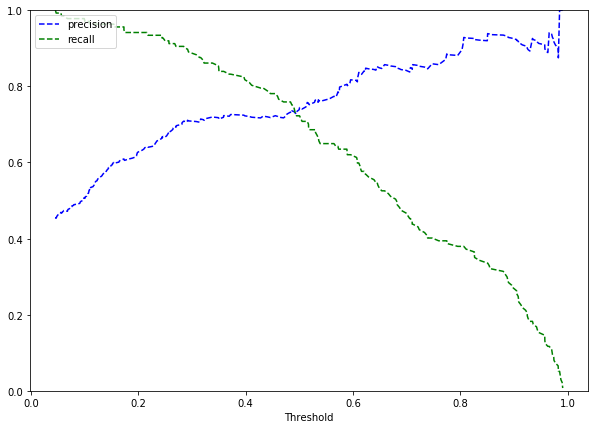

In [162]:
y_scores_lg=lg.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- Precision and recall are balanced for a threshold of about ~**0.50**.

**Finding out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       285
           1       0.74      0.72      0.73       137

    accuracy                           0.83       422
   macro avg       0.81      0.80      0.80       422
weighted avg       0.83      0.83      0.83       422



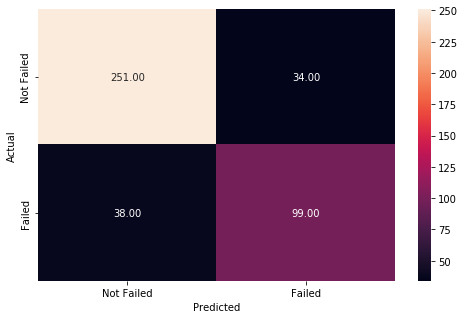

In [163]:
optimal_threshold1=.5
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       122
           1       0.72      0.71      0.72        59

    accuracy                           0.82       181
   macro avg       0.79      0.79      0.79       181
weighted avg       0.82      0.82      0.82       181



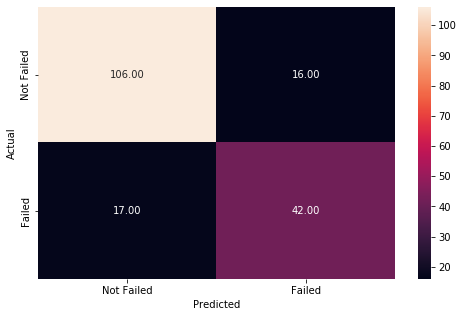

In [164]:
optimal_threshold1=.5
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observation:**
- The model gives almost the same results received from the first model.

In [165]:
#fitting SVM
svm = SVC(kernel = 'linear') #linear kernal or linear decision boundary
model = svm.fit(X = x_train, y = y_train)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       285
           1       0.73      0.80      0.77       137

    accuracy                           0.84       422
   macro avg       0.82      0.83      0.82       422
weighted avg       0.85      0.84      0.84       422



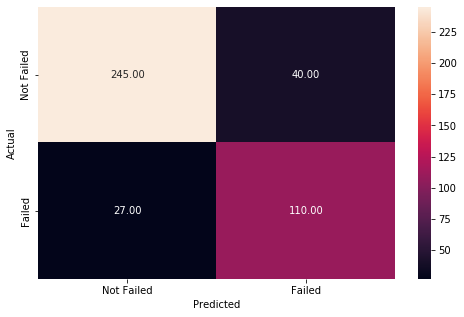

In [166]:
y_pred_train_svm = model.predict(x_train)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       122
           1       0.71      0.78      0.74        59

    accuracy                           0.82       181
   macro avg       0.80      0.81      0.80       181
weighted avg       0.83      0.82      0.83       181



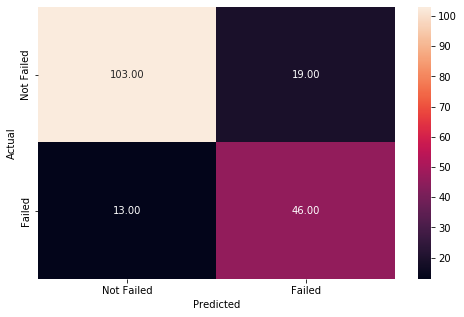

In [167]:
# Checking performance on the test data
y_pred_test_svm = model.predict(x_test)
metrics_score(y_test, y_pred_test_svm)

* SVM model with rbf linear is not overfitting as the accuracy is around 84% for both train and test dataset
* Recall for the model only around 80% which implies the model has improved, and have better chances to identify the problematic clients. 
* The precision is ~ 90% and the model will help not five false positive and will save the cost and energy of the program staff.

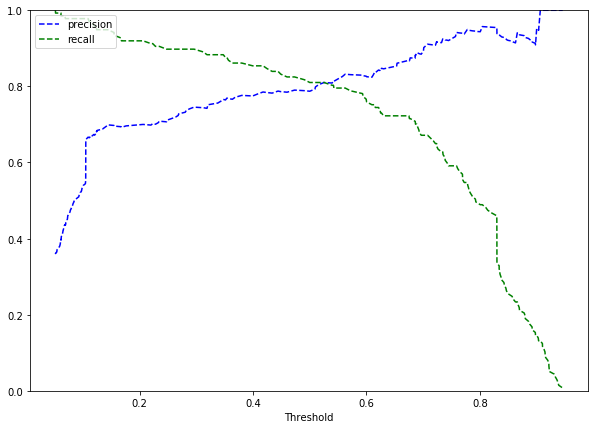

In [168]:
svm_thre=SVC(probability=True)
svm_thre.fit(x_train,y_train)
y_scores_svm=svm_thre.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       285
           1       0.83      0.80      0.81       137

    accuracy                           0.88       422
   macro avg       0.86      0.86      0.86       422
weighted avg       0.88      0.88      0.88       422



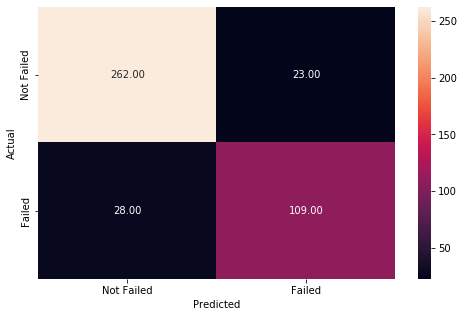

In [169]:
optimal_threshold1=.55
y_pred_train = svm_thre.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       122
           1       0.76      0.64      0.70        59

    accuracy                           0.82       181
   macro avg       0.80      0.77      0.78       181
weighted avg       0.81      0.82      0.81       181



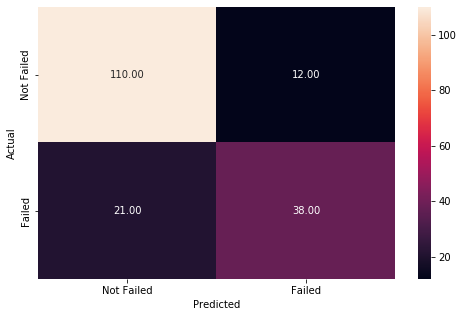

In [170]:
optimal_threshold1=.55
y_pred_test = svm_thre.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

* At the optimal threshold of .55, the model performance has not imporved. The recall decreased from .78 to .64 on the test data. 
* The SMV model with rbf linear gave us the best result on recall out of all other models. 


### **Building a Decision Tree Model**

**Let's check the model performance of decision tree**

In [171]:
#creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['Outcome']

#creating dummy variables
data = pd.get_dummies(data = data, columns= to_get_dummies_for)      

#mapping overtime and attrition
dict_failed = {'Yes': 1, 'No':0}
data['Failed'] = data.Failed.map(dict_failed)

In [172]:
data.head(3)

,Failed,Age,Household,Cases,Income,Service,Duration,Outcome_affordable housing,Outcome_avoided eviction,Outcome_food security,Outcome_housing vouchers,Outcome_net worth
0,0,41,4,1,21580,4,64,0,0,0,0,1
1,1,52,1,2,4009,11,238,0,1,0,0,0
2,0,34,1,2,22454,1,24,1,0,0,0,0


In [173]:
#Separating the target variable and other variables
Y= data.Failed
X= data.drop(['Failed'],axis=1)

In [174]:
#Splitting the data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [175]:
#building decision tree
dt = DecisionTreeClassifier(class_weight={0:0.33,1:0.67}, random_state=1)

In [176]:
#fitting decision tree
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       137

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



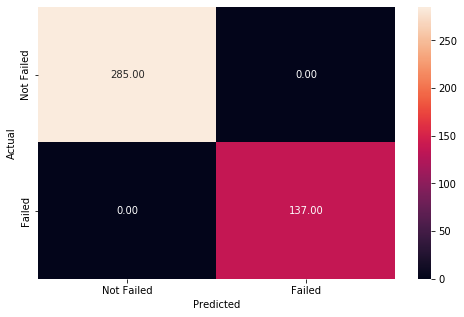

In [177]:
#checking performance on train dataset
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

**Observations:**
- The Decision tree is giving a **100% result on the training dataset.**

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       122
           1       0.80      0.73      0.76        59

    accuracy                           0.85       181
   macro avg       0.84      0.82      0.83       181
weighted avg       0.85      0.85      0.85       181



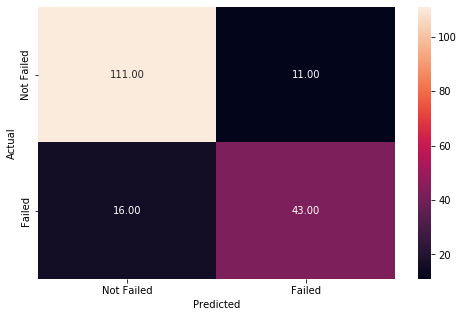

In [178]:
#checking performance on test dataset
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is .73 as compared to 1 for the training dataset. i.e. the Decision Tree is over-fitting on the data.
- The precision on the test data suggests that there's a 27% chance that the model will predict that a person is going to fail even though he/she would not.

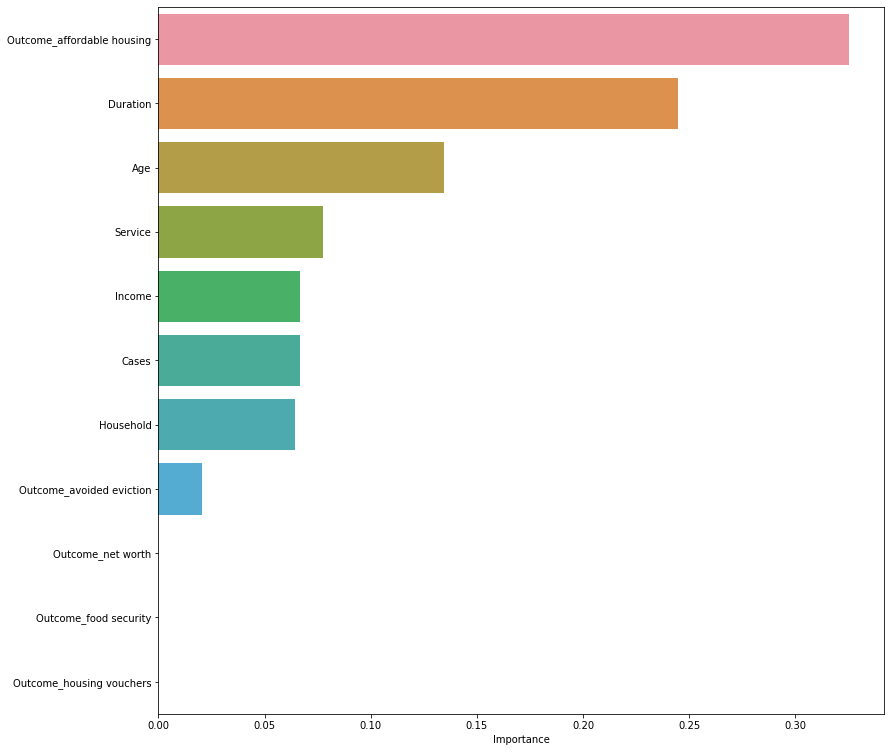

In [179]:
#plot the feature importance
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**
- According to the Decision Tree, **affordable housing outcome** is the most important feature, followed by duration, age, income and service. 

**Tuning the model**

### **Using GridSearch for Hyperparameter Tuning on the model**


In [195]:
# Choose the type of classifier 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, criterion='entropy',
                       max_depth=2, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       285
           1       0.59      0.89      0.71       137

    accuracy                           0.76       422
   macro avg       0.76      0.80      0.75       422
weighted avg       0.82      0.76      0.77       422



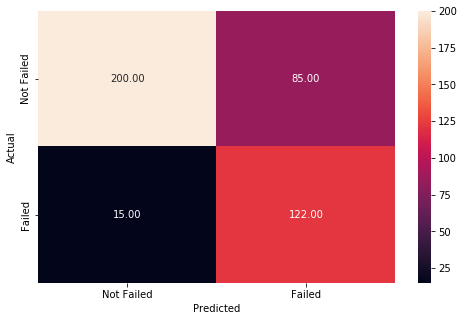

In [196]:
y_train_pred_dt=dtree_estimator.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

**Observations:**
- As compared to the base model, accuracy went down to 76%, however, the recall has improved and reached 89%.

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       122
           1       0.58      0.92      0.71        59

    accuracy                           0.76       181
   macro avg       0.76      0.80      0.75       181
weighted avg       0.83      0.76      0.76       181



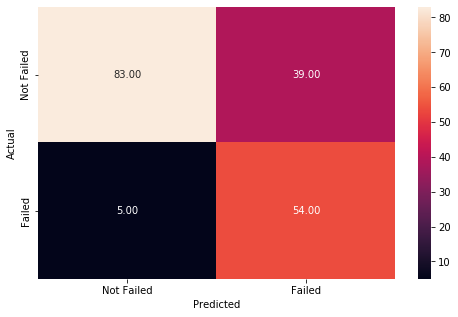

In [197]:
y_test_pred_dt=dtree_estimator.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

**Observations:**
- The tuned model increased the recall to 92% on the test, however, the accuracy for both train and test went down to 76%.
- This model is not over-fitting on the training data, and giving approx. the same result on the test and train datasets.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

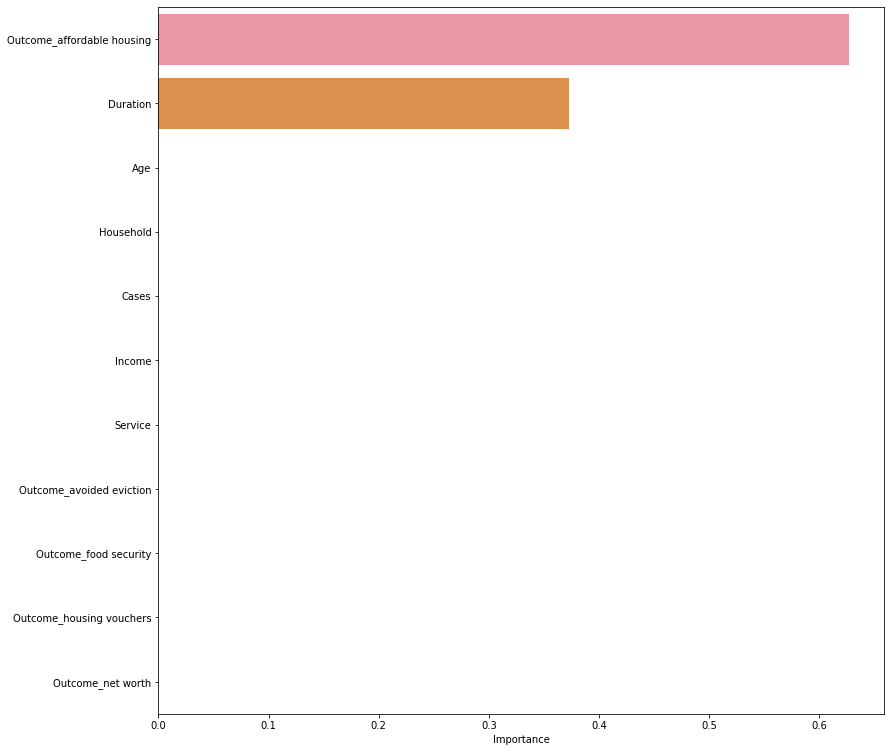

In [198]:
importances = dtree_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**
- After tuning the model the result shows that there are only 2 important features. It seems like the model is not capturing the patterns associated with other variables.
- According to the model, **affordable housing** and **duration** are the two most important features that describe why a client fails. 

### **Building the Random Forest Classifier**


In [199]:
#Fitting the decision tree classifier on the training data 
rf_estimator = RandomForestClassifier(class_weight={0:0.33,1:0.67}, random_state=1)

rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       137

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422



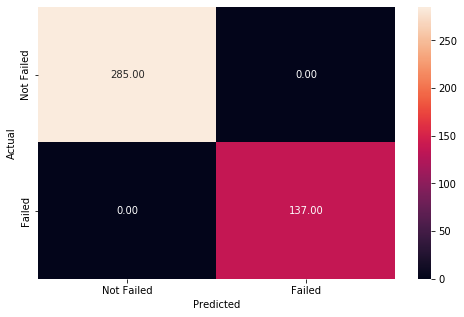

In [200]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       122
           1       0.80      0.73      0.76        59

    accuracy                           0.85       181
   macro avg       0.84      0.82      0.83       181
weighted avg       0.85      0.85      0.85       181



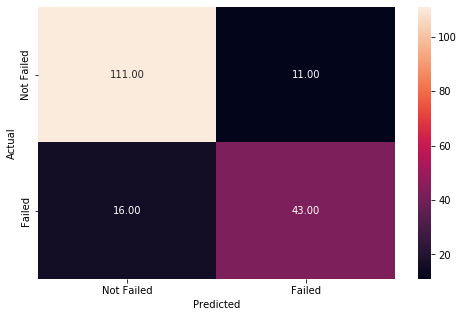

In [201]:
#Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**Observations:**
- The Random Forest classifier **seems to be overfitting on the data**, since the training recall is 1 and the testing recall is only ~0.73.
- Precision on the test data using the Random Forest is not better than of other models. 

### **Tuning the Random Forest**

In [207]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight={0:.33,1:.67}, random_state=1)

# Grid of parameters to choose from
## add from article
params_rf = {  
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [208]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, min_samples_leaf=3,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       285
           1       0.89      0.93      0.91       137

    accuracy                           0.94       422
   macro avg       0.93      0.94      0.93       422
weighted avg       0.94      0.94      0.94       422



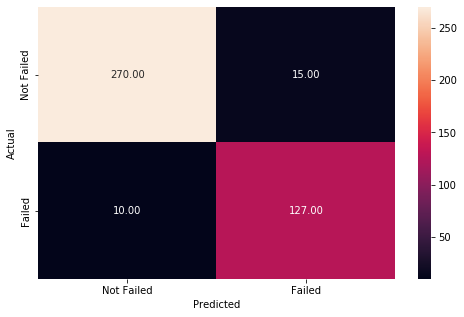

In [209]:
#Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       122
           1       0.71      0.86      0.78        59

    accuracy                           0.84       181
   macro avg       0.82      0.85      0.83       181
weighted avg       0.86      0.84      0.84       181



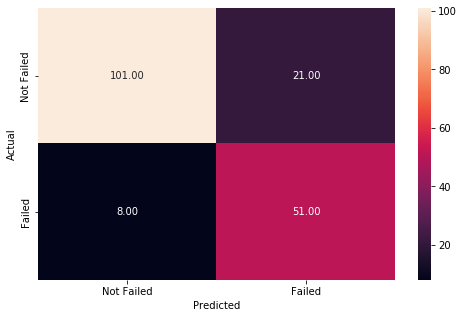

In [210]:
#Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**
- The tuned model on training dataset shows recall 93%, and on the test the recall is 86%
- The recall for the tuned model has improved from 73% to 86% recall, but decreased on precision. 
- This model is the best-performing one among all the models so far on the recall scores on the test dataset.

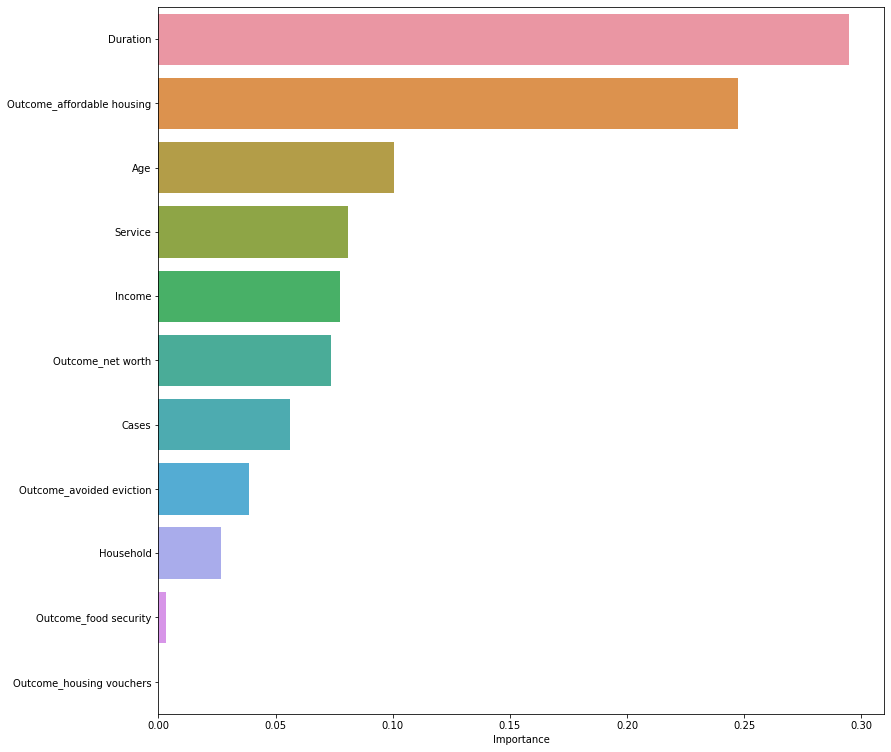

In [212]:
#plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**
- **The feature importance plot for the base model and tuned model are slighly different** - for the tuned model the first place is given to **duration** varibale, then **affordable housing**, **age**, and **service**.


### Conclusion and Recommendations 

**Conclusions:**

- There are two models that gave good results on recall (training and testing data) - Tuned Random Forest, recall - 86% and SVM with rbf liner - recall is 80%. 
- The program failure can be dealt by taking care of duration, affordable housing, age and services aspects. 


**Recommendations:**
- The analysis discovered two important features that have impact on program failure: duration and affordable housing outcome. One way to approach this problem is to ask management staff to review cases of clients every 3 months to identify those who are not achieving their outcomes and find additional resources (human/financial) to assist them. 
- Affordable housing outcome has the highest percentage of clients that not accomplished it ~ 60%. The management staff has to review their strategy on helping with housing, and assign extra caseworkers to work on their clients cases.   
